# (ADA) Homework 1: Scoring the Language Model Olympics

---

By the end of this homework, we expect you to be able to:

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up noisy real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Create meaningful visualizations to analyze the data;
- Communicate your findings in a clear and concise manner

---

**Important Dates.**

- Homework release: Fri 04 Oct 2024
- Homework due: Sat 18 Oct 2024, 23:59
- Grade release: Mon 04 Nov 2024

**Some rules**

- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.
- Make sure you use the data folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)
- Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.
- For questions containing the /Discuss:/ prefix, answer not with code, but with a textual explanation (in markdown).
- Back up any hypotheses and claims with data, since this is an important aspect of the course.
- Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. If there are multiple notebooks present, we will not grade anything.
- We will not run your notebook for you! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a fully-run and evaluated notebook. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

**A Note on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating. Fortunately, our job is not to police, but rather to educate! So, please consider the following:
- Presumably, you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!
- Some of the TAs on this course literally published many works on detecting machine-generated text.
---

## Context

Context
AI is booming! Newspapers, influencers, and your relatives all agree that AI is important. But while almost everyone agrees that AI is the future, much is unclear about what that future looks like…

Freshly graduated from the EPFL, you are hired by the Swiss government to advise on a large-scale “AI integration” initiative code-named **"NEUTRALITY"** (Navigating Efficient Upgrades Through Robust Artificial Learning Integration Techniques Yearly). Convinced by the stunning progress in language modeling, the government would like to battle the growing shortages in the education sector by using LMs. Your job description: investigate which LMs might be best suited!

You are given the results of three LMs on the [“Massive Multitask Language Understanding (MMLU)”](https://arxiv.org/abs/2009.03300) dataset to compare. This famous dataset consists of 57 subjects with multiple-choice questions, covering diverse subjects like mathematics, computer science, history, and law. Most providers of state-of-the-art LMs use this dataset to showcase the versatility of their latest models. Unfortunately, Horta-Ribeiro, the intern responsible for collecting the results, didn’t take EPFL’s famous ADA course. As a result, the collected datasets are slightly corrupted.

### A very brief primer on Language Models
Language models (LMs) are sophisticated statistical models designed to understand and generate human-like text. At their core, LMs are trained to predict the most likely continuation of a given input text. For example, given the input "The cat sat on the," an LM might predict "mat" as a likely continuation.
LMs are trained on vast text samples from various sources, including books, websites, and social media. This extensive training allows them to capture patterns and relationships in language, enabling them to generate coherent and contextually appropriate text across a wide range of topics and styles.

While LMs can produce text that appears to be written by intelligent humans, it's important to note that their capabilities can diverge from human intelligence in unexpected ways. They may sometimes generate factually incorrect information or struggle with complex reasoning tasks.

Two key concepts in understanding LMs are:
1. **Tokens**: LMs process text using "tokens" rather than individual characters. Tokens can be words, parts of words, or punctuation marks. For example, the sentence "I love AI!" might be tokenized as ["I", "love", "AI", "!"]. Tokenization is the first step in both training and using an LM.
2. **Context**: The input text provided to an LM is called the "context." This context informs the model's predictions or generations. A longer or more specific context often leads to more accurate and relevant outputs.

[See: Wikipedia entry on language models](https://en.wikipedia.org/wiki/Large_language_model)

###  Files for this assignment
This assignment is divided into three tasks, each of which should bring you a step closer to providing a recommendation toward project NEUTRALITY’s objectives:

- **Task 1**: Inspecting the results and getting your first model ranking
- **Task 2**: Inspecting the underlying data used to generate the results for possible biases
- **Task 3**: Learning about tokens and providing a final recommendation


```
📁 PROJECT_NEUTRALITY
│
├── 📄 analysis.ipynb (the file you're currently reading!)
├── 📄 requirements.txt (install into your environment)
│
├── 📁 task_1
├── 📁 task_2
└── 📁 task_2.5
```   
 

In [5]:
# please make sure you install the packages listed in the requirements.txt file in your environment!
# using pip
# pip install -r requirements.txt
#
# using Conda:
# conda create --name <env_name> --file requirements.txt
#
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind

# for random
SEED = 42

## Task 1 (18 points): What's in an average anyway?

The files needed to complete task 1 can be found in the folder "`data/task_1/`:
```
task_1/
│
├── mmlu_data/
│   └── test.csv
│
└── lm_scores/
    ├── lm_X.csv
    ├── lm_Y.csv
    └── lm_Z.csv
```

We will start by loading, (manually) inspecting, and cleaning the data. Although it doesn't seem "glamorous" (nor is it particularly fun...) - manually inspecting data is extremely important! In fact, it's one of the few things most AI and Data Science researchers agree on :). Next, we will take a first pass on ordering our Olympic podium between three LMs.

### 1.1 (1 pt)
 
Load the subfiles contained in the `mmlu_data` and `lm_scores` folders into separate dataframes:
- `df_test`
- `df_x`
- `df_y`
- `df_z`

for each, print their sizes.

In [95]:
# Load the single datasets
df_test = pd.read_csv("data/task_1/mmlu_data/test.csv")
df_x = pd.read_csv("data/task_1/lm_scores/lm_X.csv")
df_y = pd.read_csv("data/task_1/lm_scores/lm_Y.csv")
df_z = pd.read_csv("data/task_1/lm_scores/lm_Z.csv")

# Print the size of each dataset
print(f"Size of df_test: {df_test.shape[0]} rows, {df_test.shape[1]} columns")
print(f"Size of df_x: {df_x.shape[0]} rows, {df_x.shape[1]} columns")
print(f"Size of df_y: {df_y.shape[0]} rows, {df_y.shape[1]} columns")
print(f"Size of df_z: {df_z.shape[0]} rows, {df_z.shape[1]} columns")


Size of df_test: 14042 rows, 8 columns
Size of df_x: 13882 rows, 2 columns
Size of df_y: 13978 rows, 2 columns
Size of df_z: 13923 rows, 2 columns


### 1.2 (4 pt)
Unfortunately, LMs don't always output the format we want. In the column `result`, the value should be one of A, B, C, or D. 

A. For each of the LM score dataframes, use a `value_counts()` operation and print the results. 

B. /Discuss:/ Inspect the results and describe the types of answer formats you see. Besides the "expected" case, you should be able to find at least four unexpected formats.

In [96]:
# A
# Showing the most frequent answers given by the 3 models
# Due to the many possbile answers only the first 20 most frequent are presented
print("LLM x:")
print(df_x["result"].value_counts()[:20])


LLM x:
result
A                                                  2733
A                                                  1657
B                                                  1412
Answer: A                                          1398
C                                                  1134
D                                                  1124
B                                                   793
Answer: B                                           760
C                                                   622
Answer: D                                           613
D                                                   596
Answer: C                                           594
Not Sure                                             73
None of the above                                    69
Wrong, Wrong, so the answer is A                      4
enlightened egoism., so the answer is A               1
logical nominalism, so the answer is A                1
purely physical and natural, so th

In [97]:
print("LLM y:")
print(df_y["result"].value_counts()[:20])

LLM y:
result
D                                                                                      2894
Answer: D                                                                              1718
C                                                                                      1701
B                                                                                      1240
D                                                                                      1145
A                                                                                      1008
Answer: C                                                                               907
Answer: B                                                                               726
C                                                                                       634
Answer: A                                                                               597
B                                                                 

In [98]:
print("LLM z:")
print(df_z["result"].value_counts()[:20])

LLM z:
result
D                                           2257
C                                           2191
B                                           2127
A                                           2060
Answer: D                                    777
Answer: C                                    748
Answer: B                                    712
Answer: A                                    687
C                                            316
D                                            314
B                                            285
A                                            279
Not Sure                                     125
None of the above                            119
Not wrong, Not wrong, so the answer is D      10
Wrong, Wrong, so the answer is A               9
Wrong, Not wrong, so the answer is B           9
Not wrong, Wrong, so the answer is C           8
Contradictory, so the answer is B              2
all of the above, so the answer is D           2
Name: 

**Answer: B**

In addition to the "expected" cases and very specific formats (e.g., "creating insurmountable obstacles to the founding of factions, so the answer is A"), there are at least four other types of recurring unexpected formats observed in the dataset:

1. **Lettered Answers**: Responses formatted as "answer: letter," where the letter can be one of ["A", "B", "C", "D"].

2. **"None of the Above"**: Answer not listed in the possbilities ["A", "B", "C", "D"].

3. **"Not Sure"**: Answer not listed in the possbilities ["A", "B", "C", "D"].

4. **Letters with Trailing Spaces**: Even when the response appears to be a single letter, variations due to trailing spaces can create discrepancies. For example, the string "A" is distinct from "A " (with a space).


### 1.3 (5 pt)
Oh oh... That doesn't look great. Simply dropping all invalid answers seems overly wasteful, yet fixing all of these looks like a mess! Instead, let's focus for now on fixing just those answers of length < 10 characters that require only a single `str.replace()` operation. 

For example, if the answer looks like `--A--`, we could fix this by using the following simple function:

```
def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

dirty_answer = '--A--'
clean_answer = clean_answer(dirty_answer)
```

A. Filter the three score dataframes to include only answers with less than 10 characters. Make a deep copy of the dataframes as you filter them.

B. Modify the `clean_answer()` example function to clean the answers in the filtered data frames using the `apply()` functionality. Finally, make sure **all remaining answers are one of `A, B, C, or D`.**

C. /Discuss:/ Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?

In [99]:
# A
max_length = 10 # max number of char after which the answer is not considered

# remove rows where the value of "result" column is more than max_length
df_x_preprocessed = df_x[df_x["result"].str.len() < max_length].copy()
df_y_preprocessed = df_y[df_y["result"].str.len() < max_length].copy()
df_z_preprocessed = df_z[df_z["result"].str.len() < max_length].copy()

In [100]:
# B
# Define function to replace specific characters
def clean_answer(s, patterns=[' ']):
    for pat in patterns:
        s = str(s).replace(pat, '')
    return s

# Replace specific character in each value of "result" column
df_x_preprocessed["result"] = df_x_preprocessed["result"].apply(lambda x: clean_answer(x, [' ', "Answer:"]))
df_y_preprocessed["result"] = df_y_preprocessed["result"].apply(lambda x: clean_answer(x, [' ', "Answer:"]))
df_z_preprocessed["result"] = df_z_preprocessed["result"].apply(lambda x: clean_answer(x, [' ', "Answer:"]))

# Remove rows with values that are not in 
accepted_answers = ["A", "B", "C", "D"]
df_x_preprocessed.drop(df_x_preprocessed[~ df_x_preprocessed["result"].isin(accepted_answers)].index, axis=0, inplace=True)
df_y_preprocessed.drop(df_y_preprocessed[~df_y_preprocessed["result"].isin(accepted_answers)].index, axis=0, inplace=True)
df_z_preprocessed.drop(df_z_preprocessed[~df_z_preprocessed["result"].isin(accepted_answers)].index, axis=0, inplace=True)


# Reset the index of the DataFrame
df_x_preprocessed.reset_index(drop=True, inplace=True)
df_y_preprocessed.reset_index(drop=True, inplace=True)
df_z_preprocessed.reset_index(drop=True, inplace=True)


# Just for verification: check that all the answers are in the form ["A", "B", "C", "D"]
all_x_accepted = df_x_preprocessed["result"].isin(accepted_answers).all()
print(f"All results in LLM x are accepted: {all_x_accepted}")
all_y_accepted = df_y_preprocessed["result"].isin(accepted_answers).all()
print(f"All results in LLM y are accepted: {all_y_accepted}")
all_z_accepted = df_z_preprocessed["result"].isin(accepted_answers).all()
print(f"All results in LLM z are accepted: {all_z_accepted}")

All results in LLM x are accepted: True
All results in LLM y are accepted: True
All results in LLM z are accepted: True


**C. /Discuss:/**

As shown in the cell below, after the preprocessing and filtering, few row has been deleted (only model Z is amost 10%).
Thus, we can hypothesize that no major drawbacks should arise from these preprocessing choices.

In [101]:
# Print before and after for df_x
print(f"LLM x\n\tNumber of answers with less than {max_length} characters:\n\t\tBefore: {df_x.shape[0]}\n\t\tAfter: {df_x_preprocessed.shape[0]}\n\t\tLoss Percentage: {((df_x.shape[0] - df_x_preprocessed.shape[0]) / df_x.shape[0]) * 100:.2f}%\n")

# Print before and after for df_y
print(f"LLM y\n\tNumber of answers with less than {max_length} characters:\n\t\tBefore: {df_y.shape[0]}\n\t\tAfter: {df_y_preprocessed.shape[0]}\n\t\tLoss Percentage: {((df_y.shape[0] - df_y_preprocessed.shape[0]) / df_y.shape[0]) * 100:.2f}%\n")

# Print before and after for df_z
print(f"LLM z\n\tNumber of answers with less than {max_length} characters:\n\t\tBefore: {df_z.shape[0]}\n\t\tAfter: {df_z_preprocessed.shape[0]}\n\t\tLoss Percentage: {((df_z.shape[0] - df_z_preprocessed.shape[0]) / df_z.shape[0]) * 100:.2f}%\n")


LLM x
	Number of answers with less than 10 characters:
		Before: 13882
		After: 13436
		Loss Percentage: 3.21%

LLM y
	Number of answers with less than 10 characters:
		Before: 13978
		After: 13551
		Loss Percentage: 3.05%

LLM z
	Number of answers with less than 10 characters:
		Before: 13923
		After: 12753
		Loss Percentage: 8.40%



### 1.4 (3 pt)

Now that our answer columns are nicely formatted, let's take a look at model performance:

A. Both the `MMLU` dataframes and the language model score data frames have the columns `question_id`. For each of the language model score data frames, use an inner join operation with the `df_test` dataframe on the `question_id` column.

B. Add a new column to each of the resulting dataframes called `correct`, that checks if the model's answer in `result` is the same as the expected answer in the column `answer`. Then, print the average score of each model.

In [102]:
# A
# Inner join to add information of each question
df_x_preprocessed_join = pd.merge(
    left=df_x_preprocessed, 
    right=df_test,
    left_on="question_id",
    right_on="question_id",
    how="inner", #only take the one that are in both df
    suffixes=["",""] #as all cols have different names, do not put suffixes
    ).copy()
df_y_preprocessed_join = pd.merge(
    left=df_y_preprocessed,
    right=df_test,
    left_on="question_id",
    right_on="question_id",
    how="inner",  # only take the ones that are in both df
    suffixes=["", ""]  # as all cols have different names, do not put suffixes
    ).copy()
df_z_preprocessed_join = pd.merge(
    left=df_z_preprocessed,
    right=df_test,
    left_on="question_id",
    right_on="question_id",
    how="inner",  # only take the ones that are in both df
    suffixes=["", ""]  # as all cols have different names, do not put suffixes
).copy()

# Little check
display(df_x_preprocessed_join)


,question_id,result,question,A,B,C,D,answer,subject
0,0,B,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra
1,1,C,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra
2,2,D,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra
3,3,B,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B,abstract algebra
4,4,B,Find the product of the given polynomials in t...,2x^2 + 5,6x^2 + 4x + 6,0,x^2 + 1,B,abstract algebra
...,...,...,...,...,...,...,...,...,...
13431,14037,A,What has been a central focus of religious tra...,Peace and harmony,Power and influence,Truth and love,Wisdom and ethics,A,world religions
13432,14038,A,To whom did ordinary folk appeal during a dro...,The Buddha,Laozi,The Queen Mother of the West,Confucius,C,world religions
13433,14039,B,The theological term homoousios means which o...,of a similar substance,of the same substance,of like substance,of human substance,B,world religions
13434,14040,B,"According to the Japanese origin myth, who giv...",Es,Izanagi,Izanami,Kami,B,world religions


In [103]:
# B

# Create new column to say if the model has given the right answer
predictions = df_x_preprocessed_join["result"] #Extract the model prediction
true_answers = df_x_preprocessed_join["answer"] #Extract the true answers
correct_col_x = [True if p == t else False for (p, t) in zip(predictions, true_answers)] #Put True if they are the same
df_x_preprocessed_join["correct"] = correct_col_x

predictions_y = df_y_preprocessed_join["result"]
true_answers_y = df_y_preprocessed_join["answer"]
correct_col_y = [True if p == t else False for (p, t) in zip(predictions_y, true_answers_y)]
df_y_preprocessed_join["correct"] = correct_col_y

predictions_z = df_z_preprocessed_join["result"]
true_answers_z = df_z_preprocessed_join["answer"]
correct_col_z = [True if p == t else False for (p, t) in zip(predictions_z, true_answers_z)]
df_z_preprocessed_join["correct"] = correct_col_z


# Little Check:
display(df_x_preprocessed_join.head(3))
display(df_y_preprocessed_join.head(3))
display(df_z_preprocessed_join.head(3))

,question_id,result,question,A,B,C,D,answer,subject,correct
0,0,B,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,True
1,1,C,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,True
2,2,D,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,True


,question_id,result,question,A,B,C,D,answer,subject,correct
0,0,D,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,False
1,1,D,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,False
2,2,D,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,True


,question_id,result,question,A,B,C,D,answer,subject,correct
0,0,B,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,True
1,1,B,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,False
2,2,C,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,False


In [104]:
# Print average accuracy for each model
average_correct_x = 100 * df_x_preprocessed_join['correct'].sum() / df_x_preprocessed_join.shape[0]
print(f"Average correct answers for model x is: {average_correct_x:.2f}%")

average_correct_y = 100 * df_y_preprocessed_join['correct'].sum() / df_y_preprocessed_join.shape[0]
print(f"Average correct answers for model y is: {average_correct_y:.2f}%")

average_correct_z = 100 * df_z_preprocessed_join['correct'].sum() / df_z_preprocessed_join.shape[0]
print(f"Average correct answers for model z is: {average_correct_z:.2f}%")

Average correct answers for model x is: 76.75%
Average correct answers for model y is: 74.58%
Average correct answers for model z is: 66.33%


### 1.5 (5 pt)

Hmmm, something doesn't seem quite right. Let's investigate how "balanced" this dataset is:

A. For each of the 57 subjects in the MMLU, compare the number of questions answered by each model. Print the subjects for which there is a more than 10% difference.

B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

C. Finally, print the updated accuracy on the rebalanced data.

**hint:**:
- (A) For a given subject, let model X and model Y have answered 181 and 200 questions respectively. You can consider this a 10% difference from the perspective of X since: (200 - 181) / 181 > 0.10

In [105]:
# A

# Count how many questions for each category
counts_cat_x = df_x_preprocessed_join.groupby("subject")["subject"].count()
counts_cat_y = df_y_preprocessed_join.groupby("subject")["subject"].count()
counts_cat_z = df_z_preprocessed_join.groupby("subject")["subject"].count()

# Create a new df
cat_df = pd.DataFrame({"x": counts_cat_x, "y":counts_cat_y, "z":counts_cat_z})

# Add a columns with the percentage difference 
    # ATTENTION: first model is the baseline
    # "diff_XY": difference from the perspective of X repsct to Y
cat_df["diff_XY"] = abs((cat_df["y"] - cat_df["x"]) / cat_df["x"])
cat_df["diff_YZ"] = abs((cat_df["z"] - cat_df["y"]) / cat_df["y"])
cat_df["diff_ZX"] = abs((cat_df["x"] - cat_df["z"]) / cat_df["z"])

# Print categories that have more than max_cat_difference 
max_cat_difference = 0.1
unbalanced_cat = []
for cat,row in cat_df.iterrows(): # attention; in this case the index is the name of the subjexct
    if (row[["diff_XY", "diff_YZ", "diff_ZX"]] > max_cat_difference).any():  
        unbalanced_cat.append(cat)

display(cat_df.head(3))
display(cat_df[cat_df.index.isin(unbalanced_cat)])

,x,y,z,diff_XY,diff_YZ,diff_ZX
subject,,,,,,
abstract algebra,95,97,95,0.021053,0.020619,0.000000
anatomy,129,130,125,0.007752,0.038462,0.032000
astronomy,144,148,137,0.027778,0.074324,0.051095


,x,y,z,diff_XY,diff_YZ,diff_ZX
subject,,,,,,
college chemistry,96,98,84,0.020833,0.142857,0.142857
college computer science,97,98,84,0.010309,0.142857,0.154762
computer security,95,98,87,0.031579,0.112245,0.091954
formal logic,109,123,113,0.128440,0.081301,0.035398
high school geography,195,193,176,0.010256,0.088083,0.107955
logical fallacies,154,136,147,0.116883,0.080882,0.047619
moral disputes,329,304,250,0.075988,0.177632,0.316000
moral scenarios,737,865,774,0.173677,0.105202,0.047804


In [116]:
# B

# HOW TO REBALANCE?
# Subsample the incriminated subjects in order to have the same number of questions in each model.
# The number choosen is the one of the smallest counts

def rebalance_df(df, col_name, cat, number_samples, seed):
    filtered_df = df[df[col_name] == cat] 
    sampled_df = filtered_df.sample(n=number_samples, random_state=seed)  # Set random_state for reproducibility
    non_x_df = df[df[col_name] != cat]
    final_df = pd.concat([sampled_df, non_x_df], ignore_index=True)
    return final_df


print("Unbalanced Subjects:")
for index, row in cat_df[cat_df.index.isin(unbalanced_cat)].iterrows():
    min_count = int(row[["x", "y", "z"]].min())
    print(f"\t{index}")
    df_x_preprocessed_join = rebalance_df(df=df_x_preprocessed_join, col_name="subject", cat=index, number_samples=min_count, seed=SEED)
    df_y_preprocessed_join = rebalance_df(df=df_y_preprocessed_join, col_name="subject", cat=index, number_samples=min_count, seed=SEED)
    df_z_preprocessed_join = rebalance_df(df=df_z_preprocessed_join, col_name="subject", cat=index, number_samples=min_count, seed=SEED)

df_x_bal = df_x_preprocessed_join.copy()
df_y_bal = df_y_preprocessed_join.copy()
df_z_bal = df_z_preprocessed_join.copy()


Unbalanced Subjects:
	college chemistry
	college computer science
	computer security
	formal logic
	high school geography
	logical fallacies
	moral disputes
	moral scenarios


In [114]:
# C
# Print average accuracy for each model
average_correct_x = 100 * df_x_bal['correct'].sum() / df_x_bal.shape[0]
print(f"Average correct answers for model x is: {average_correct_x:.2f}%")

average_correct_y = 100 * df_y_bal['correct'].sum() / df_y_bal.shape[0]
print(f"Average correct answers for model y is: {average_correct_y:.2f}%")

average_correct_z = 100 * df_z_bal['correct'].sum() / df_z_bal.shape[0]
print(f"Average correct answers for model z is: {average_correct_z:.2f}%")

Average correct answers for model x is: 76.76%
Average correct answers for model y is: 74.66%
Average correct answers for model z is: 66.32%


## Task 2 (26 points): What do you mean A > D > B > C...?

Nice work! Having successfully inspected, cleaned, and rebalanced the provided data, you head over to director of the government's NEUTRALITY project. Ms. Sakota is happy with your work so far, but worried that the sloppy intern might have done more undetected damage. To be sure, she orders a new set of evaluations of all models on both MMLU and another dataset.

After cleaning up and rebalancing, you are left with the concatenated score files in the second folder `task_2`:
```
task_2/
│
└── lm_scores_mmlu.csv
│
└── lm_scores_other.csv
```

Each has a new column called `model_name`, which is one of `X, Y` or `Z`.



_NOTE: **only** use data from `task_2` and `task_2_5` for this assignment! The values in `lm_scores_mmlu.csv` will NOT be the same as the dataframes you finished in task 1. This is due to "randomness" or "temperature" in language model inference. This can slightly shift around generative results. (Conveniently: it also ensures any mistakes made in Task 1 don't propogate further ;) )_

In [120]:
# PROVIDED CODE
df_mmlu = pd.read_csv('data/task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('data/task_2/lm_scores_other.csv')

### 2.1 (4 pt)

Let's explore the new results:

A. Compute the mean accuracy and standard errors of each model on both datasets and print the results.

B. Then, show your results in a bar plot using standard errors with a 95% confidence interval around the mean. Make sure the plot is easy to read and well annotated.

C. /Discuss:/ the plot you created: (i) can you say that one of the models is the best? (ii) is there anything that seems odd?

In [153]:
# A
df_accuracy = pd.DataFrame()

for model in df_mmlu["model_name"].unique():
    df_filtered = df_mmlu[df_mmlu["model_name"] == model]
    df_temp = pd.DataFrame({
        "accuracy": [df_filtered["correct"].sum()/df_filtered.shape[0]],
        "sem": [df_filtered["correct"].std()/np.sqrt(df_filtered.shape[0])],
        "model": [model],
        "dataset": ["mmlu"]
    })
    df_accuracy = pd.concat([df_accuracy, df_temp], ignore_index=True)

for model in df_other["model_name"].unique():
    df_filtered = df_other[df_other["model_name"] == model]
    df_temp = pd.DataFrame({
        "accuracy": [df_filtered["correct"].sum()/df_filtered.shape[0]],
        "sem": [df_filtered["correct"].std()/np.sqrt(df_filtered.shape[0])],
        "model": [model],
        "dataset": ["other"]
    })
    df_accuracy = pd.concat([df_accuracy, df_temp], ignore_index=True)

# Calculate 95% confidence intervals (the height of the error bar in the next plot)
df_accuracy["yerr"] = 1.96 * df_accuracy["sem"]


display(df_accuracy)

,accuracy,sem,model,dataset,yerr
0,0.743588,0.004038,X,mmlu,0.007914
1,0.761542,0.003941,Y,mmlu,0.007723
2,0.655951,0.004393,Z,mmlu,0.008610
3,0.787976,0.006668,X,other,0.013069
4,0.720936,0.007317,Y,other,0.014341
5,0.671721,0.007660,Z,other,0.015014


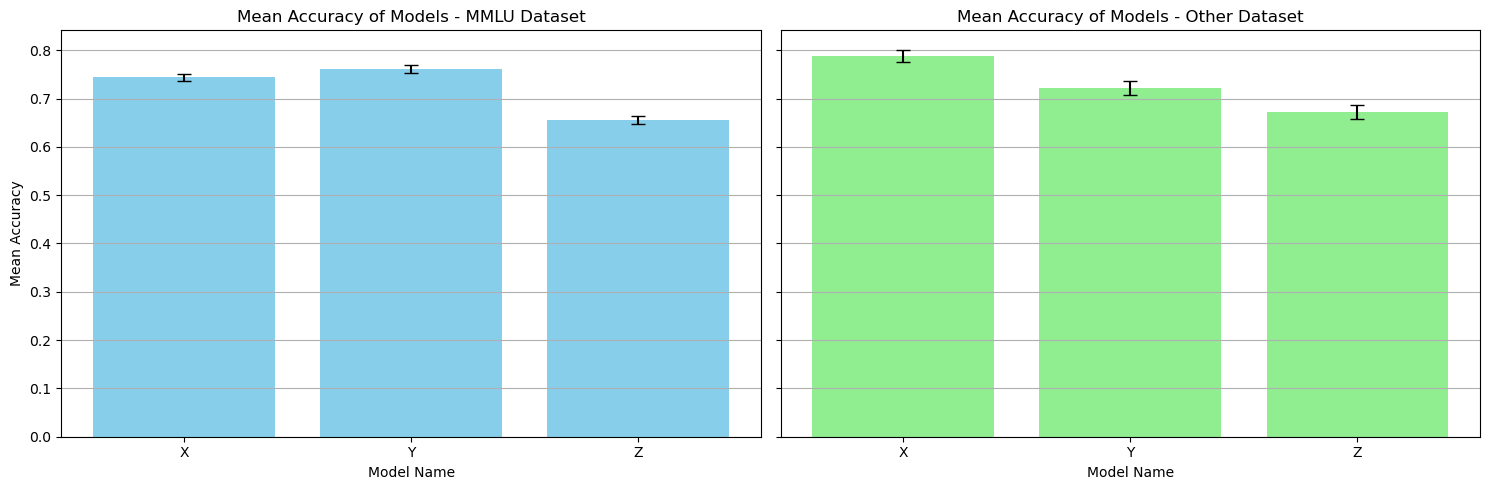

In [154]:
# B
fig, axs = plt.subplots(1,2,figsize=(15,5), sharey=True)

#mmlu dataset
mmlu_data = df_accuracy[df_accuracy["dataset"] == "mmlu"]
axs[0].bar(mmlu_data["model"], mmlu_data["accuracy"], yerr=mmlu_data["yerr"], capsize=5, color='skyblue')
axs[0].set_title('Mean Accuracy of Models - MMLU Dataset')
axs[0].set_ylabel('Mean Accuracy')
axs[0].set_xlabel('Model Name')
axs[0].set_xticks(mmlu_data["model"])
axs[0].set_xticklabels(mmlu_data["model"])
axs[0].grid(axis='y')

# Bar plot for df_other
other_data = df_accuracy[df_accuracy["dataset"] == "other"]
axs[1].bar(other_data["model"], other_data["accuracy"], yerr=other_data["yerr"], capsize=5, color='lightgreen')
axs[1].set_title('Mean Accuracy of Models - Other Dataset')
axs[1].set_xlabel('Model Name')
axs[1].set_xticks(other_data["model"])
axs[1].set_xticklabels(other_data["model"])
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()

**C. /Discuss:/**

1) Simply looking at the charts, model X seems to be performing better than the other 2, and model Z doing the worst by quite a margin. However this is not enough to conclude anything about the quality of the models.
2) One observation we can make is that the models seem to be performing quite differently from one dataset to the next, with a difference in accuracy of about 5% between the two datasets for models X and Y. Something else we can notice is that the standard errors are significantly bigger in the "Other Dataset" compared to the "MMLU Dataset".

### 2.2 (5 pt)

Ms. Sakota has assured you that both datasets contain questions of similar difficulty, so, what could be going on here?

A. What is the distribution of correct answers (A, B, C, D) for each dataset? Create a bar chart to visualize this.

B. Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

**hints**:
- for (A), keep in mind that df_mmlu and df_other contain the results of all models, i.e., the `question_id` column is duplicated.
- for (A), take care to clearly annotate the bar chart, e.g., title, y-label, legend.
- for (B), clearly state the null hypothesis and alternative hypothesis
- use the `chi2_contingency` function from `scipy.stats`
- format your results from answer (A) as a 2D array

,answer,count,correct_count,frac_corr
0,A,4833,3608,0.746534
1,B,8829,6264,0.709480
2,C,10209,7182,0.703497
3,D,11217,8222,0.732995


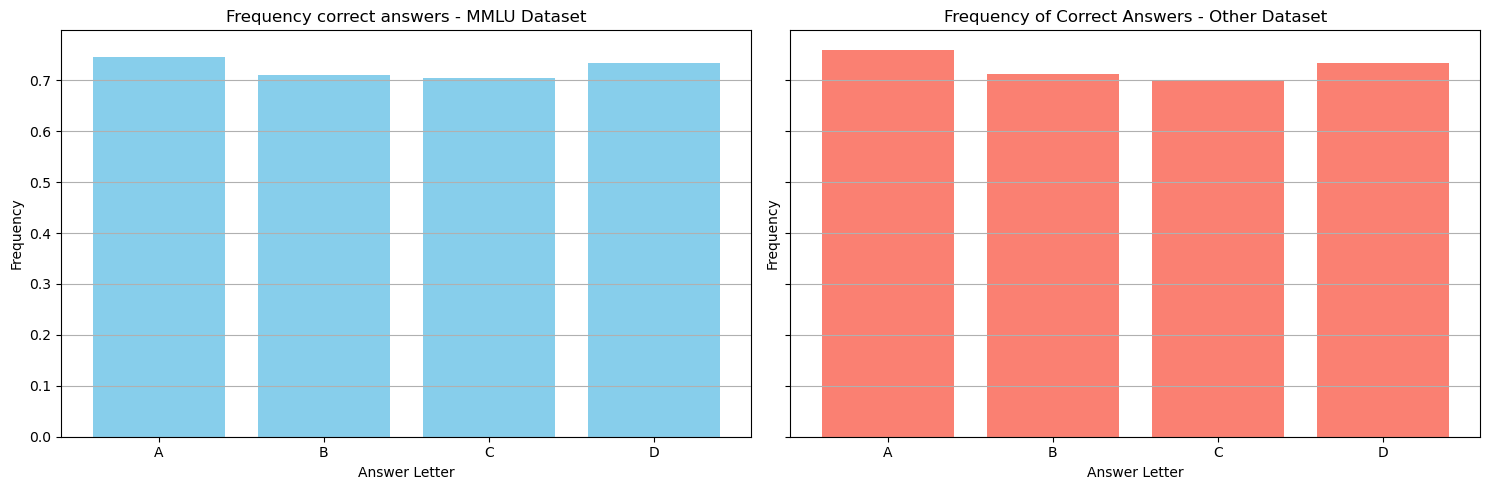

In [193]:
# A
fig, axs = plt.subplots(1,2,figsize=(15,5), sharey=True)

# Count total answers and correct answers by letter
df_counts_mmlu = df_mmlu.groupby("answer").agg(
    count=('correct', 'size'),                    # Total count of answers (take the col "correct" and apply size fucntion)
    correct_count=('correct', 'sum')              # Sum of correct answers
).reset_index()
df_counts_mmlu["frac_corr"] = df_counts_mmlu["correct_count"] / df_counts_mmlu["count"] # Calculate the fraction of correct answers
display(df_counts_mmlu)

# do the same for the orther df
df_counts_other = df_other.groupby("answer").agg(
    count=('correct', 'size'),                    # Total count of answers
    correct_count=('correct', 'sum')              # Sum of correct answers
).reset_index()
df_counts_other["frac_corr"] = df_counts_other["correct_count"] / df_counts_other["count"]


#llmu dataset
mmlu_data = df_accuracy[df_accuracy["dataset"] == "mmlu"]
axs[0].bar(df_counts_mmlu["answer"],df_counts_mmlu["frac_corr"], capsize=5, color='skyblue')
axs[0].set_title('Frequency correct answers - MMLU Dataset')
axs[0].set_ylabel('Frequency')
axs[0].set_xlabel('Answer Letter')
axs[0].set_xticks(df_counts_mmlu["answer"])
axs[0].set_xticklabels(df_counts_mmlu["answer"])
axs[0].grid(axis='y')

# Bar plot for df_other
axs[1].bar(df_counts_other["answer"], df_counts_other["frac_corr"], capsize=5, color='salmon')
axs[1].set_title('Frequency of Correct Answers - Other Dataset')
axs[1].set_ylabel('Frequency')
axs[1].set_xlabel('Answer Letter')
axs[1].set_xticks(df_counts_other["answer"])
axs[1].set_xticklabels(df_counts_other["answer"])
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()

In [201]:
# B

contingency_table = pd.DataFrame({
    'Correct': [df_mmlu['correct'].sum(), df_other['correct'].sum()],
    'Incorrect': [df_mmlu['correct'].count() - df_mmlu['correct'].sum(), 
                  df_other['correct'].count() - df_other['correct'].sum()]
}, index=['MMLU', 'Other'])

display(contingency_table)

# Perform Chi-squared test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Null Hypothesis (H0): Assumes that there is no association between the two categorical variables (i.e., there is a significant differce between the 2 distributions).")
print("Alternative Hypothesis (H1): Assumes that there is an association between the variables (i.e., they are similar).")

# Decision
alpha = 0.05  # significance level
if p < alpha:
    conclusion = "Reject the null hypothesis: There is a significant difference in the distribution of correct answers between the two datasets."
else:
    conclusion = "Fail to reject the null hypothesis: There is no significant difference in the distribution of correct answers between the two datasets."

print(conclusion)

print("We conculde that even if we observe some differces in the percentage of correct answers between the 2 datasets, in reality they are just due ot chnace.")

,Correct,Incorrect
MMLU,25276,9812
Other,8197,3080


Null Hypothesis (H0): Assumes that there is no association between the two categorical variables (i.e., there is a significant differce between the 2 distributions).
Alternative Hypothesis (H1): Assumes that there is an association between the variables (i.e., they are similar).
Fail to reject the null hypothesis: There is no significant difference in the distribution of correct answers between the two datasets.
We conculde that even if we observe some differces in the percentage of correct answers between the 2 datasets, in reality they are just due ot chnace.


### 2.3 (7 pt)

Let's dive in deeper:

A. What is language model X's mean accuracy conditioned on the four answer options for each dataset?

B. Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

C. Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

In [209]:
# A
df_X_mmlu = df_mmlu[df_mmlu["model_name"] == "X"].groupby("answer").agg(
    tot_correct=("correct", "sum"),
    tot=("correct", "size")
)
df_X_mmlu["accuracy"] = df_X_mmlu["tot_correct"] / df_X_mmlu["tot"]
display(df_X_mmlu)

df_X_other = df_other[df_other["model_name"] == "X"].groupby("answer").agg(
    tot_correct=("correct", "sum"),
    tot=("correct", "size")
)
df_X_other["accuracy"] = df_X_other["tot_correct"] / df_X_other["tot"]
display(df_X_other)

,tot_correct,tot,accuracy
answer,,,
A,1567,1611,0.972688
B,2352,2943,0.799185
C,2409,3403,0.707905
D,2369,3739,0.633592


,tot_correct,tot,accuracy
answer,,,
A,1050,1078,0.974026
B,900,1116,0.806452
C,625,924,0.676407
D,387,641,0.603744


In [210]:
# B

??????????????

T TEST FOR DISCRETE VAR???????

SyntaxError: invalid syntax (3692463077.py, line 5)

In [ ]:
# C


????????????????????

### 2.4 (2 pt)

What an intriguing finding! 

A. Print the mean accuracies conditioned on the correct answer for all LMs for each dataset.

B. /Discuss:/ What do you observe?

In [211]:
# A

models = df_mmlu["model_name"].unique()  # Get unique model names from the MMLU dataset

# Create an empty DataFrame to store results
accuracy_summary = pd.DataFrame()

for model in models:
    # MMLU Dataset
    df_model_mmlu = df_mmlu[df_mmlu["model_name"] == model].groupby("answer").agg(
        tot_correct=("correct", "sum"),
        tot=("correct", "size")
    )
    df_model_mmlu["accuracy"] = df_model_mmlu["tot_correct"] / df_model_mmlu["tot"]
    df_model_mmlu["model_name"] = model
    df_model_mmlu["dataset"] = "mmlu"
    
    # Append results to the summary DataFrame
    accuracy_summary = pd.concat([accuracy_summary, df_model_mmlu.reset_index()], ignore_index=True)

    # Other Dataset
    df_model_other = df_other[df_other["model_name"] == model].groupby("answer").agg(
        tot_correct=("correct", "sum"),
        tot=("correct", "size")
    )
    df_model_other["accuracy"] = df_model_other["tot_correct"] / df_model_other["tot"]
    df_model_other["model_name"] = model
    df_model_other["dataset"] = "other"
    
    # Append results to the summary DataFrame
    accuracy_summary = pd.concat([accuracy_summary, df_model_other.reset_index()], ignore_index=True)

# Display the summarized accuracy results for all models
display(accuracy_summary)

,answer,tot_correct,tot,accuracy,model_name,dataset
0,A,1567,1611,0.972688,X,mmlu
1,B,2352,2943,0.799185,X,mmlu
2,C,2409,3403,0.707905,X,mmlu
3,D,2369,3739,0.633592,X,mmlu
4,A,1050,1078,0.974026,X,other
5,B,900,1116,0.806452,X,other
6,C,625,924,0.676407,X,other
7,D,387,641,0.603744,X,other
8,A,1005,1611,0.623836,Y,mmlu
9,B,2025,2943,0.688073,Y,mmlu


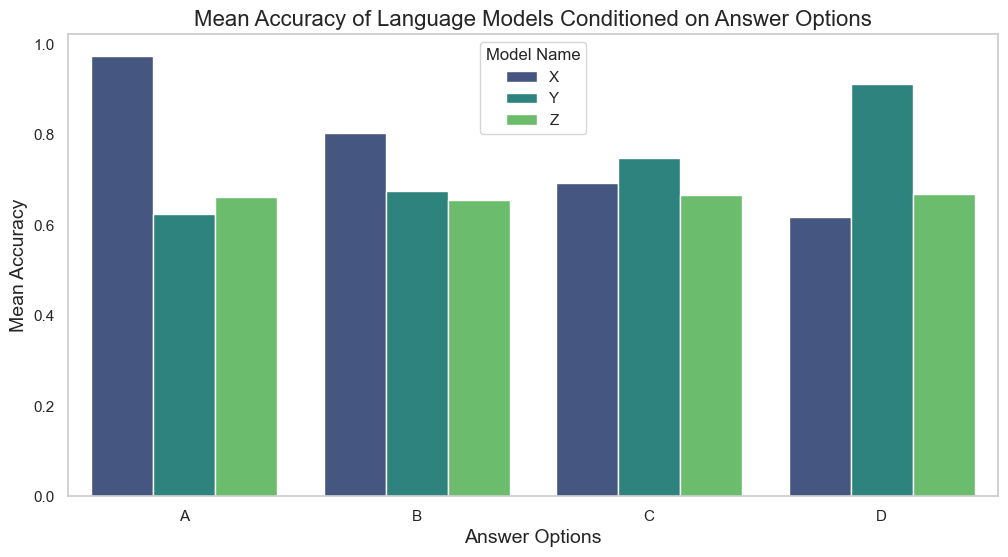

In [213]:
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a plot with facets for each dataset
plt.figure(figsize=(12, 6))

# Create a bar plot for the accuracy summary
sns.barplot(data=accuracy_summary, x='answer', y='accuracy', hue='model_name', 
            palette='viridis', errorbar=None, dodge=True)

# Add titles and labels
plt.title('Mean Accuracy of Language Models Conditioned on Answer Options', fontsize=16)
plt.ylabel('Mean Accuracy', fontsize=14)
plt.xlabel('Answer Options', fontsize=14)
plt.legend(title='Model Name')
plt.grid(axis='y')

# Show the plot
plt.show()

**B. /Discuss:/**

????????????????????
- model X and Y seems to have a skewed correct rate toward secific questions
- model Z has a very low accuracy on all anwers

### 2.5 (2 pt)

Concerned with your findings so far, you quickly consult with Ms. Sakota. After thinking it over, Ms. Sakota concludes that more tests are needed. She orders a second round of MMLU results. However, the clever Ms. Sakota thinks of the following twist: while keeping questions fixed, she randomly permutes the position of the correct answer. The new results can be found in the folder `data/task_2_5/`:
```
task_2_5/
│
└── lm_scores_mmlu_shuffle.csv
```

/Discuss:/ Why would Ms. Sakota do this?

**/Discuss:/**

For different pouposes, like:
- avois that the model becomes biased towards a specific answer location. For instance, if the correct answer is always the first one, the model will learn to pikc the first one independtly of any correct axplanation.
- save time and money. Creating a new set of questions, means that Ms. Sakota shoudl hire a someone to create the new dataset to use for testing the LLM.

### 2.6 (4 pt)

Increasingly sceptical of the language models' performance, you read up on proper testing practices. You stumble upon the concept of [test-rested stability](https://en.wikipedia.org/wiki/Repeatability), which roughtly states that:

"_Measurements taken by a single person or instrument on the same item, under the same conditions, and in a short period of time, should have the same results._"

In our case, we would assume an LM would have the same performance on a given question regardless of the correct answer position. One way of testing this is by using the following metric:

$$\text{test-retest metric} = \frac{1}{N}\sum_{i=1}^N \frac{1}{M}\sum_{j=1}^M c^i_0 c_j^i,$$

where $c^i_0 \in \{0, 1\}$ indicates whether the model answers the $i^{\text{th}}$ question correctly (1 if correct, 0 if incorrect). $c_j^i$ indicates whether the model answers the $i^{\text{th}}$ question correctly in the $j^{\text{th}}$ shuffled version of the answer label content. Finally, $M$ is the total number of shuffles and $N$ is the dataset size.

Task: compute the test-retest metric for each language model using the original `lm_scores_mmlu.csv` file and the new `lm_scores_mmlu_shuffle.csv` file. Using a bar plot, visualize your results by comparing the accuracy of the original `lm_scores_mmlu.csv` and the test-retest scores.

**hints**
- what is $M$ in our case?

(bonus: no points, but so much sweet, sweet knowledge - check out [the following article](https://arxiv.org/pdf/2406.19470v1))

In [234]:
# Load the new dataset
df_mmlu = pd.read_csv('data/task_2/lm_scores_mmlu.csv')
df_mmlu_shuffle = pd.read_csv("data/task_2_5/lm_scores_mmlu_shuffle.csv")
df_mmlu["shuffled"] = True

# stack them
df = pd.merge(left = df_mmlu, 
              right = df_mmlu_shuffle,
              on = ["question_id", "model_name"],
              suffixes=["_normal", "_shuffle"]
              )

print(df_mmlu.shape)
print(df_mmlu_shuffle.shape)
print(df.shape)
df.head(3)
df.columns

(35088, 12)
(35088, 11)
(35088, 21)


Index(['result_normal', 'question_id', 'question_normal', 'A_normal',
       'B_normal', 'C_normal', 'D_normal', 'answer_normal', 'subject_normal',
       'correct_normal', 'model_name', 'shuffled', 'result_shuffle',
       'question_shuffle', 'A_shuffle', 'B_shuffle', 'C_shuffle', 'D_shuffle',
       'answer_shuffle', 'subject_shuffle', 'correct_shuffle'],
      dtype='object')

In [231]:
# calculate accuracy for the normal model
df_accuracy = pd.DataFrame()

for model in df_mmlu["model_name"].unique():
    df_filtered = df_mmlu[df_mmlu["model_name"] == model]
    df_temp = pd.DataFrame({
        "accuracy": [df_filtered["correct"].sum()/df_filtered.shape[0]],
        "sem": [df_filtered["correct"].std()/np.sqrt(df_filtered.shape[0])],
        "model": [model],
        "dataset": ["mmlu"]
    })
    df_accuracy = pd.concat([df_accuracy, df_temp], ignore_index=True)

df_accuracy

,accuracy,sem,model,dataset
0,0.743588,0.004038,X,mmlu
1,0.761542,0.003941,Y,mmlu
2,0.655951,0.004393,Z,mmlu


In [239]:
models = df_mmlu["model_name"].unique()

# with M = 1 the formula shooudl be:
    # 1/n sum(c_mmlu * c_mmule_shuffled)

trm = []
for model in models:
    df_filtered = df[df["model_name"] == model]
    print(model)
    # Calculate test retest metric
    c_shuffle = df_filtered["correct_shuffle"] #correct columns of sguffle
    c_normal = df_filtered["correct_normal"] #correct columns of sguffle
    trm.append(np.mean(c_shuffle * c_normal))

df_accuracy["trm"] = trm

display(df_accuracy)

X
Y
Z


,accuracy,sem,model,dataset,trm
0,0.743588,0.004038,X,mmlu,0.588406
1,0.761542,0.003941,Y,mmlu,0.571648
2,0.655951,0.004393,Z,mmlu,0.441604


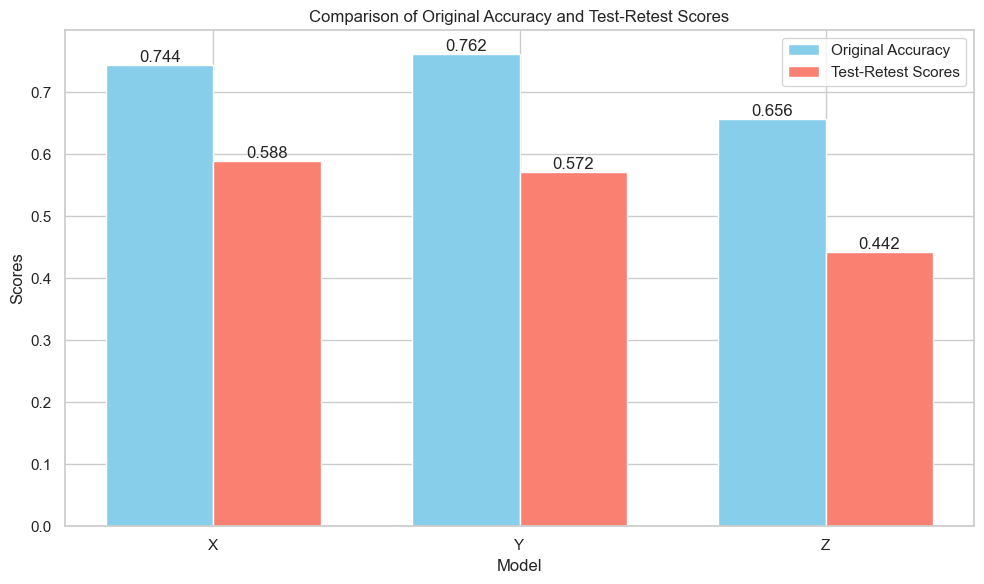

In [240]:
# Setting up the bar plot
bar_width = 0.35  # Width of bars
x = np.arange(len(df_accuracy['model']))  # the label locations

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for accuracy and trm scores
bars1 = ax.bar(x - bar_width/2, df_accuracy['accuracy'], bar_width, label='Original Accuracy', color='skyblue')
bars2 = ax.bar(x + bar_width/2, df_accuracy['trm'], bar_width, label='Test-Retest Scores', color='salmon')

# Adding labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Original Accuracy and Test-Retest Scores')
ax.set_xticks(x)
ax.set_xticklabels(df_accuracy['model'])
ax.legend()

# Adding value labels on top of bars
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

**discussion**
- model's performance can vary significantly between tests. T
- l performs well on a training dataset but poorly on new, unseen data (as reflected by a low TRM), it could indicate that the model is overfitting

### 2.7 (2 pt)

A. Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

B. /Discuss:/ Describe what you observe

[bonus: not scored, but again _that sweet, sweet knowledge_] Could you think of a plausible explanation?

In [ ]:
# A

B. /Discuss:/

## Task 3 (16 points): What do Questions and Answers look like for a Language Model?

While you feel pretty good about the tests you conducted so far, something still bothers you: what if the language models don't see the data like you do? Suddenly, you receive a phone call from a wise AI sage in the West, _Westoda_:

```
"Hmm, correct you are, young padawan, to question how the world is seen by large language models! Simple 'text' it is not, hmm? No, no, no! Characters and words, the way of puny humans, this is not, heh heh heh.

'Tokens', they use, yes! Mysterious and powerful, these tokens are. Expand our vocabulary, they do, beyond the simple 'a to Z'. Chunky blocks of text, they become, yes! 'Hello world', a simple phrase it may seem. But to a language model, '[24912, 2375]' it might appear, yes! Confusing, it is, hmm?

Wise, it would be, to explore these MMLU data points through the eyes of a language model, you think? Yes, yes! Much to learn, there is. The ways of the tokens, understand you must, if truly comprehend the great LMs, you wish to.
Meditate on this, you should. The force of natural language processing, strong it is. But patience, you must have, my young padawan. For only through great study and contemplation, will the mysteries of the tokens reveal themselves to you, they will. Yes, hmmm!"
```

Admittingly, Westoda at times speaks in riddles… However, he was explaining a crucial aspect of modern LMs called [Tokenization](https://learn.microsoft.com/en-us/dotnet/ai/conceptual/understanding-tokens):


“Tokens are words, character sets, or combinations of words and punctuation that are used by [language models (LMs)] to decompose text into. Tokenization is the first step in training”

Instead of characters, LMs process natural language using “tokens”. While this is useful for a number of reasons, it does at times introduce some “unintuitive” behavior…

In [ ]:
# PROVIDED CODE

try:
    import tiktoken
except Exception as e:
    print('installing tiktoken package')
    
    !pip install tiktoken
    
    import tiktoken

def tokenize_text(s):
    enc = tiktoken.encoding_for_model('gpt-4o')
    tokens = enc.encode(str(s))
    return tokens

example_string = 'hello world'
print(f'humans see: "{example_string}" --> language models see: {tokenize_text(example_string)}')

### 3.1 (5 pt)

Use the provided code in the cell above to "see the world through the eyes of a language model":

A. Tokenize the questions of the original MMLU data provided in task 1: `task_1/mmlu_data/test.csv` and plot the token distribution (the frequency of each token).

B. Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

C. Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

**hint**
- There are a _lot_ of tokens, consider using a cutoff point and log scale
- For (c), they should sum to 1

In [ ]:
# A

In [ ]:
# B

In [ ]:
# C

### 3.2 (3 pt)

What if the number of "A", "B", "C", and "D" tokens in the question and answer pairs could influence a language model's decisions?

A. For each combined question-answers pair, compute: 
1. the number of "A", "B", "C", and "D" tokens; and
2. the total number of tokens.
3. then, group by the "correct" answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens. 
4. finally, print your results

B. /Discuss:/ What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?


In [ ]:
# A

B. /Discuss:/

### 3.3 (4 pt)

Three of the most important considerations when deciding between language models are:

Quality
Costs
Speed

So far, much of your analysis has focused on quality. However, the government has indicated that they are quite concerned about both the total costs and speed as well. Specifically, it has been brought to their attention that a new `turbo` model has been launched! 

This model is both cheaper and faster than the models you evaluated so far. However, there is a catch: the context length* is much smaller than that of the other LMS. Namely, it can only process **300** tokens during inference. Meanwhile, the other models can process up to 100K tokens! 

*_The “context length” refers to the number of tokens that can be given to an LM as input._

A. Are there subjects where using the cheaper model might be problematic? I.e., where part of the question and answer(s) might not fit completely in the context?

B. /Discuss:/ Can you think of a strategy that would balance the needs of the government?

**hint**:
- An LM needs to have both the question and the different answer options in its context

In [ ]:
# A

B. /Dicsuss:/

### 3.4 (4 pt)

/Discuss:/ The time has come to give your final recommendation on the use of LMs in education to the government! Taking into account everything you analyzed in all the preceding tasks (1, 2, and 3), please write a short recommendation consisting of 4 bullet points discussing your concerns.

**hint**
- Try to use the MECE framework: _Mutually Exclusive Collectively Exhaustive_

/Discuss:/
1. 

2. 

3. 

4. 